In [1]:
%matplotlib notebook

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np

## Read data

In [9]:
filepath = '/disks/arctic5_raid/stroeve/Snow_on_Seaice/comparisons/Aug-Apr_mean_snow_depth'
df = pd.read_csv(filepath, sep='\t', header=None, index_col=0, 
                 names=['year','ERAI_mean','MERRA2_mean','ERAI_stdev','MERRA2_stdev'])
df['ERAI_upper'] = df['ERAI_mean'] + df['ERAI_stdev']
df['ERAI_lower'] = df['ERAI_mean'] - df['ERAI_stdev']
df['MERRA2_upper'] = df['MERRA2_mean'] + df['MERRA2_stdev']
df['MERRA2_lower'] = df['MERRA2_mean'] - df['MERRA2_stdev']

df.head()

,ERAI_mean,MERRA2_mean,ERAI_stdev,MERRA2_stdev,ERAI_upper,ERAI_lower,MERRA2_upper,MERRA2_lower
year,,,,,,,,
1980,9.21447,16.5294,4.00670,5.88783,13.22117,5.20777,22.41723,10.64157
1981,8.78859,14.3407,4.17928,5.76751,12.96787,4.60931,20.10821,8.57319
1982,8.52217,15.5297,3.27091,5.88129,11.79308,5.25126,21.41099,9.64841
1983,9.48577,15.6050,3.85362,6.31488,13.33939,5.63215,21.91988,9.29012
1984,8.77687,15.1880,3.52246,6.15950,12.29933,5.25441,21.34750,9.02850


In [13]:
df.max()

ERAI_mean        9.49424
MERRA2_mean     17.62440
ERAI_stdev       4.38368
MERRA2_stdev     7.87983
ERAI_upper      13.87792
ERAI_lower       5.64405
MERRA2_upper    25.06323
MERRA2_lower    10.70053
dtype: float64

<IPython.core.display.Javascript object>


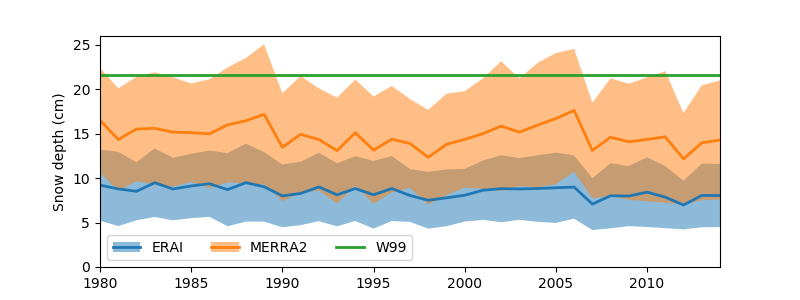

In [67]:
fig, ax = plt.subplots(figsize=(8,3))

ax.set_xlim(1980,2014)
ax.set_ylim(0.,26.)
ax.set_ylabel('Snow depth (cm)')

l1 = ax.plot(df.index, df['ERAI_mean'], lw=2, label='ERAI')
l2 = ax.plot(df.index, df['MERRA2_mean'], lw=2, label='MERRA2')

p1 = ax.fill_between(df.index, df['ERAI_lower'], df['ERAI_upper'], alpha=0.5, label='ERAI')
p2 = ax.fill_between(df.index, df['MERRA2_lower'], df['MERRA2_upper'], alpha=0.5, label='MERRA2')

l3 = ax.plot([1980,2014], [21.6,21.6], lw=2, label='W99')

# Make lengend handles
legend_elements = [(Patch(facecolor=p1.get_facecolor()[0]),
                    Line2D([0], [0], color=l1[0].get_color(), lw=2)),
                   (Patch(facecolor=p2.get_facecolor()[0]),
                    Line2D([0], [0], color=l2[0].get_color(), lw=2)),
                   Line2D([0], [0], color=l3[0].get_color(), lw=2)]
legend_labels = ['ERAI', 'MERRA2', 'W99']
                          
ax.legend(legend_elements, legend_labels, loc='lower left', bbox_to_anchor=(0., 0., 0.5, 0.01), ncol=3)

fig.savefig('compare_annual_mean_snow_depth.png')